In [1]:
# Importing libraries
import sys
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import pathlib
import warnings
import glob
import seaborn as sns
import joypy
warnings.filterwarnings("ignore")

In [2]:
current_dir = pathlib.Path().absolute()

In [3]:
def dataframe_extract_data(dataframe,spot_type_selected = 0, minimal_cluster_size=3):
    ''' This function is intended to read a dataframe and returns 
        number_of_spots_per_cell, number_of_spots_per_cell_cytosol, number_of_spots_per_cell_nucleus, number_of_TS_per_cell, ts_size, cell_size
    '''
    number_cells = dataframe['cell_id'].nunique()
    # Number of spots
    number_of_spots_per_cell = np.asarray([len( dataframe.loc[  (dataframe['cell_id']==i)  & (dataframe['spot_type']==spot_type_selected) ].spot_id) for i in range(0, number_cells)])
    # Number of spots in cytosol
    number_of_spots_per_cell_cytosol = np.asarray([len( dataframe.loc[  (dataframe['cell_id']==i) & (dataframe['is_nuc']==False) & (dataframe['spot_type']==spot_type_selected) ].spot_id) for i in range(0, number_cells)])
    # Number of spots in nucleus
    number_of_spots_per_cell_nucleus = np.asarray([len( dataframe.loc[  (dataframe['cell_id']==i) &  (dataframe['is_cluster']==False) & (dataframe['is_nuc']==True) & (dataframe['spot_type']==spot_type_selected)    ].spot_id) for i in range(0, number_cells)])
    # Total number of spots
    total_of_spots_per_cell_nucleus = np.asarray([len( dataframe.loc[  (dataframe['cell_id']==i) & (dataframe['spot_type']==spot_type_selected)    ].spot_id) for i in range(0, number_cells)])
    # Number of TS per cell.
    number_of_TS_per_cell = [len( dataframe.loc[  (dataframe['cell_id']==i) &  (dataframe['is_cluster']==True) & (dataframe['is_nuc']==True) & (dataframe['spot_type']==spot_type_selected) & (dataframe['cluster_size'] >=4) ].spot_id) for i in range(0, number_cells)]
    number_of_TS_per_cell= np.asarray(number_of_TS_per_cell)
    #number_of_TS_per_cell=number_of_TS_per_cell[number_of_TS_per_cell>minimal_cluster_size]   
    # Number of RNA in a TS
    ts_size =  dataframe.loc[   (dataframe['is_cluster']==True) & (dataframe['is_nuc']==True)  & (dataframe['spot_type']==spot_type_selected)   ].cluster_size.values
    # Size of each cell
    cell_size = np.asarray([len( dataframe.loc[  (dataframe['cell_id']==i) & (dataframe['spot_type']==0)].cell_area_px.values) for i in range(0, number_cells)])
    return number_of_spots_per_cell,number_of_spots_per_cell_cytosol,number_of_spots_per_cell_nucleus,number_of_TS_per_cell,ts_size,cell_size,number_cells,total_of_spots_per_cell_nucleus


In [4]:
%%capture
data_dir = ['analysis_GAPDH-Cy3_NFKBIA-Cy5_woDex___nuc_120__cyto_220__psfz_350__psfyx_120',
            'analysis_GAPDH-Cy3_NFKBIA-Cy5_5min_100nMDex___nuc_120__cyto_220__psfz_350__psfyx_120',
            'analysis_GAPDH-Cy3_NFKBIA-Cy5_10min_100nMDex___nuc_120__cyto_220__psfz_350__psfyx_120',
            'analysis_GAPDH-Cy3_NFKBIA-Cy5_15min_100nMDex___nuc_120__cyto_220__psfz_350__psfyx_120',
            'analysis_GAPDH-Cy3_NFKBIA-Cy5_30min_100nMDex___nuc_120__cyto_220__psfz_350__psfyx_120',
            'analysis_GAPDH-Cy3_NFKBIA-Cy5_1h_100nMDex___nuc_120__cyto_220__psfz_350__psfyx_120',
            'analysis_GAPDH-Cy3_NFKBIA-Cy5_2h_100nMDex___nuc_120__cyto_220__psfz_350__psfyx_120',
            'analysis_GAPDH-Cy3_NFKBIA-Cy5_4h_100nMDex___nuc_120__cyto_220__psfz_350__psfyx_120']

condition_labels = ['wo', '5min','10min','15min','30min','1h', '2h','4h']
plot_title= "GAPDH-Cy3_NFKBIA-Cy5_Dex"
max_val = 300


In [5]:
%%capture
'''
data_dir =['analysis_GAPDH-Cy3_NFKBIA-Cy5_WO_IL-1B___nuc_120__cyto_220__psfz_350__psfyx_120',
            'analysis_GAPDH-Cy3_NFKBIA-Cy5_5min_10ng_mL_IL-1B___nuc_120__cyto_220__psfz_350__psfyx_120',
            'analysis_GAPDH-Cy3_NFKBIA-Cy5_10min_10ng_mL_IL-1B___nuc_120__cyto_220__psfz_350__psfyx_120',
            'analysis_GAPDH-Cy3_NFKBIA-Cy5_15min_10ng_mL_IL-1B___nuc_120__cyto_220__psfz_350__psfyx_120',
            'analysis_GAPDH-Cy3_NFKBIA-Cy5_20min_10ng_mL_IL-1B___nuc_120__cyto_220__psfz_350__psfyx_120',
            'analysis_GAPDH-Cy3_NFKBIA-Cy5_30min_10ng_mL_IL-1B___nuc_120__cyto_220__psfz_350__psfyx_120',
            'analysis_GAPDH-Cy3_NFKBIA-Cy5_1h_10ng_mL_IL-1B___nuc_120__cyto_220__psfz_350__psfyx_120',
            'analysis_GAPDH-Cy3_NFKBIA-Cy5_2h_10ng_mL_IL-1B___nuc_120__cyto_220__psfz_350__psfyx_120',
            'analysis_GAPDH-Cy3_NFKBIA-Cy5_3h_10ng_mL_IL-1B___nuc_120__cyto_220__psfz_350__psfyx_120']

condition_labels = ['wo', '5min','10min','15min','20min','30min','1h', '2h','3h']
plot_title= "GAPDH-Cy3_NFKBIA-Cy5_IL-1B"
max_val = 100
'''

In [6]:
list_spots_cell_conditions=[]
list_spots_nuc=[]
list_number_cells =[]
for i in range (0, len (data_dir)):
    dataframe_dir = current_dir.joinpath('analyses',data_dir[i])    # loading files from "analyses" folder
    dataframe_file = glob.glob( str(dataframe_dir.joinpath('dataframe_*')) )[0]
    dataframe_file
    df = pd.read_csv(dataframe_file) 
    number_of_spots_per_cell,number_of_spots_per_cell_cytosol,number_of_spots_per_cell_nucleus,number_of_TS_per_cell,ts_size,cell_size,number_cells,total_of_spots_per_cell_nucleus = dataframe_extract_data(df)
    list_spots_cell_conditions.append(total_of_spots_per_cell_nucleus)
    list_spots_nuc.append(number_of_spots_per_cell_nucleus)
    list_number_cells.append(number_cells)
    del number_of_spots_per_cell,number_of_spots_per_cell_cytosol,number_of_spots_per_cell_nucleus,number_of_TS_per_cell,ts_size,cell_size,number_cells,total_of_spots_per_cell_nucleus


In [7]:
print('number of cells in each dataset: ', list_number_cells)

number of cells in each dataset:  [373, 327, 343, 332, 383, 333, 331, 299]


In [8]:
# defining the dimensions for the array.
max_number_cells = max(list_number_cells)
number_conditions = len(list_number_cells)

In [9]:
# creating an array with the same dimensions
spots_coditions_array = np.empty((max_number_cells,number_conditions))
spots_coditions_array[:] = np.NaN
# replace the elements in the array
for i in range(0,number_conditions ):
    spots_coditions_array[0:list_number_cells[i],i] = list_spots_cell_conditions[i] 
# creating a dataframe
df = pd.DataFrame(data=spots_coditions_array, columns=condition_labels)
df


,wo,5min,10min,15min,30min,1h,2h,4h
0,74.0,14.0,13.0,2.0,57.0,124.0,87.0,85.0
1,511.0,37.0,93.0,11.0,90.0,149.0,79.0,163.0
2,227.0,16.0,106.0,49.0,80.0,175.0,68.0,155.0
3,203.0,44.0,8.0,74.0,16.0,107.0,169.0,176.0
4,103.0,28.0,84.0,22.0,77.0,290.0,259.0,101.0
...,...,...,...,...,...,...,...,...
378,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN
379,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
380,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
381,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN


In [10]:
# Removing 1% extreme values.
for col in df.columns:
    max_data_value= df[col].quantile(0.99)
    df[col] = np.where(df[col]>=max_data_value, np.nan, df[col])

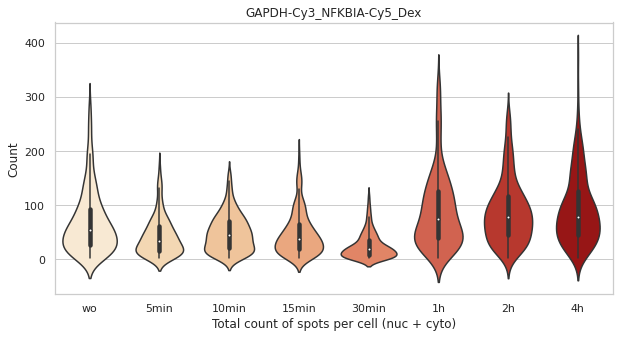

In [11]:
plt.figure(figsize=(10,5))
sns.set(font_scale = 1)
sns.set_style("whitegrid")
p_dist =sns.violinplot(data=df, scale="count",palette="OrRd")
p_dist.set_xlabel("Total count of spots per cell (nuc + cyto)")
p_dist.set_ylabel("Count")
p_dist.set_title(plot_title)
#p_dist.set_ylim(-10,max_val)
plt.savefig('Violin__'+plot_title+'.png', transparent=False)
plt.show()

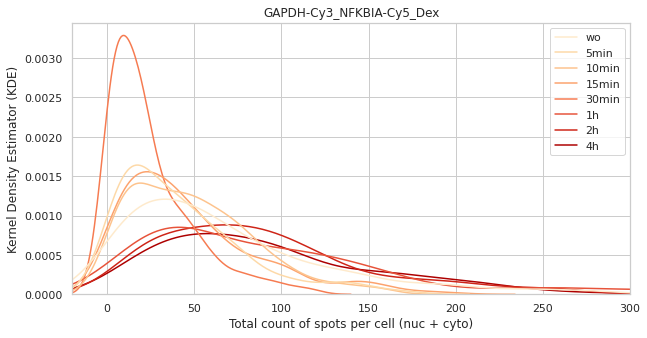

In [12]:
plt.figure(figsize=(10,5))
sns.set(font_scale = 1)
sns.set_style("whitegrid")
p_dist =sns.kdeplot(data=df,palette="OrRd")
p_dist.set_xlabel("Total count of spots per cell (nuc + cyto)")
p_dist.set_ylabel("Kernel Density Estimator (KDE)")
p_dist.set_title(plot_title)
#sns.set(font_scale = 1)
p_dist.set_xlim(-20,max_val)
plt.savefig('Distributions__'+plot_title+'.png', transparent=False)
plt.show()

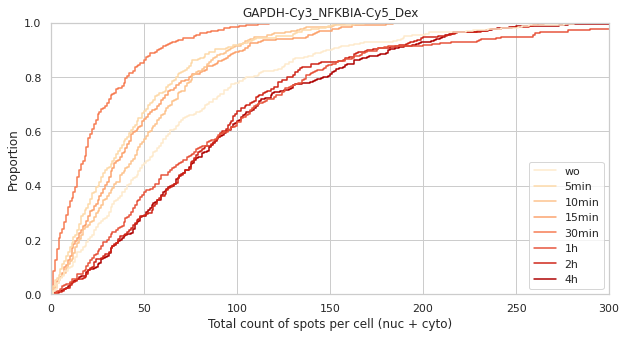

In [13]:
plt.figure(figsize=(10,5))
sns.set(font_scale = 1)
sns.set_style("whitegrid")
p_dist =sns.ecdfplot(data=df,palette="OrRd")
p_dist.set_xlabel("Total count of spots per cell (nuc + cyto)")
p_dist.set_ylabel("Proportion")
p_dist.set_title(plot_title)
p_dist.set_xlim(0,max_val)
plt.savefig('ECDF__'+ plot_title+'.png', transparent=False)
plt.show()

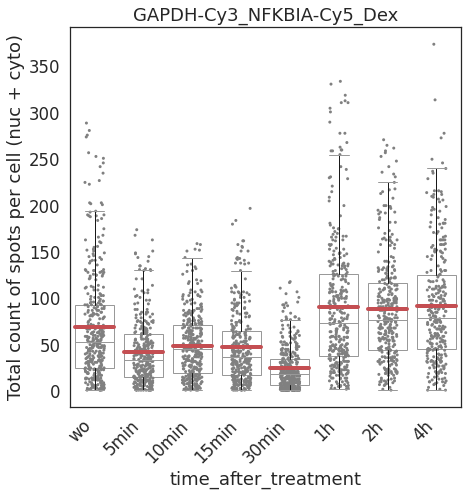

In [14]:
plt.figure(figsize=(7,7))
sns.set(font_scale = 1.5)
sns.set_style("white")
p = sns.stripplot(data=df, size=3, color='0.5', jitter=0.2)
plt.xticks(rotation=45, ha="right")
sns.set(font_scale = 1.5)
#p.set_ylim(0,max_val)
bp=sns.boxplot( 
            meanprops={'visible': True,'color': 'r', 'ls': 'solid', 'lw': 4},
            #medianprops={'visible': False,'color': 'orangered', 'ls': 'solid', 'lw': 1},
            whiskerprops={'visible': True, 'color':'k','ls': 'solid', 'lw': 1},
            data=df,
            showcaps={'visible': False, 'color':'orangered', 'ls': 'solid', 'lw': 1}, # Q1-Q3 25-75%
            ax=p,
            showmeans=True,meanline=True,zorder=10,showfliers=False,showbox=True,linewidth=1,color='w')
p.set_xlabel("time_after_treatment")
p.set_ylabel("Total count of spots per cell (nuc + cyto)")
p.set_title(plot_title)
sns.set(font_scale = 1.5)
plt.savefig('BarPlots__'+plot_title+'.png', transparent=False)
plt.show()

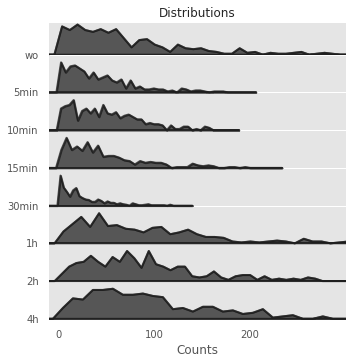

In [18]:
plt.style.use('ggplot')
fig, axes = joypy.joyplot(df,kind="counts", bins=50,range_style='own',
                          grid="y", linewidth=2, legend=False, figsize=(5,5),  
                          title="none",ylim='own',alpha=0.7,x_range=[-10.0,max_val],overlap=0,linecolor="k", color="k",
                          colormap=mpl.cm.Blues)
plt.title('Distributions', fontsize=12)
plt.xlabel('Counts', fontsize=12)
plt.ylabel('Conditions', fontsize=12)
plt.savefig('JoyPlots__'+plot_title+'.png', transparent=False)

# Moving plots to a final folder "comparing_distributions"

In [16]:
# create results folder
destination_folder = 'comparing_distributions_'+plot_title

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

plot_names = ['Violin__'+plot_title+'.png',
'Distributions__'+plot_title+'.png',
'BarPlots__'+plot_title+'.png',
'JoyPlots__'+plot_title+'.png',
'ECDF__'+plot_title+'.png']

#figure_path 
for name_plot in plot_names:
    pathlib.Path().absolute().joinpath(name_plot).rename(pathlib.Path().absolute().joinpath(destination_folder,name_plot))


In [17]:
# https://deepnote.com/@deepnote/Joyplot-Introduction-RmbhozJJRC6alCu8xcsbHQ
# https://github.com/leotac/joypy/issues/10
# https://towardsdatascience.com/creating-joy-plots-using-joypy-67327a15eb50
# https://seaborn.pydata.org/tutorial/distributions.html#tutorial-ecdf

# Color palettes
#https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
